# Homework 18 - Random numbers and processes -Daniel Teeuwsen

In [7]:
import numpy              as np
import scipy.stats
import scipy.special
%matplotlib inline
import matplotlib.pyplot  as plt
import matplotlib.patches as draw

#### Excercise 1
Calculate the probability of rolling two 6's by rolling the two dice 1,000,000 times. compare to the true probability.

In [80]:
N = 10**6
count = 0

# takes a minute to run

for i in range(N):
    roll = np.random.randint(low=1,high=7,size=2)
    if roll[0] == 6 and roll[1] == 6 :
        count = count + 1

print('Experimental probability is ' + str(count/N))
print('True probability is ' + str(1/36))
    

Experimental probability is 0.027728
True probability is 0.027777777777777776


#### Excercise 2

Consider the radioactive decay chain of Bi-213 to semi-stable Bi-209
<img width=200 src="decaychain.png"/>
Bi-213 has been used to <a href="https://en.wikipedia.org/wiki/Isotopes_of_bismuth">treat leukemia.</a>

- Write a simulation of this decay chain, starting with 10,000 atoms of Bi-213, and take 1 second steps for 20,000 seconds. 

You have to work the chain from the bottom up - starting with the decay of Pb-209 to Bi-209, then Tl-209 to Pb-209, and last Bi-213 to its two daughters. If you don't start at the bottom, and instead start at the top, you might decay the same atom twice in the same step. You will also have to add bias to the selection of which decay Bi-213 atoms undertake with the *branching ratio* probability shown.

- Make a plot of the number of atoms of each isotope over time.

In [81]:
# Should take about 2 minutes to run *

t_max = 20000        # seconds
t = np.arange(0,t_max,1)

bi_213_half = 2760   # seconds
tl_209_half = 132    
pb_209_half = 198   

P_bi = 1-2**(-1/bi_213_half)
P_tl = 1-2**(-1/tl_209_half)
P_pb = 1-2**(-1/pb_209_half)

Nbi_213 = 10000     # initial number of atoms 
Ntl_209 = 0
Npb_209 = 0
Nbi_209 = 0

bi_213 = np.zeros(t_max)
tl_209 = np.zeros(t_max)
pb_209 = np.zeros(t_max)
bi_209 = np.zeros(t_max)


for i in range(t_max):
    
    bi_213[i] = Nbi_213
    tl_209[i] = Ntl_209
    pb_209[i] = Npb_209
    bi_209[i] = Nbi_209
    
    old_bi = 0
    new_tl = 0
    new_pb = 0
    new_bi = 0
    
    for atom in range(Npb_209):
        if np.random.random() < P_pb :
            new_bi += 1
    
    for atom in range(Ntl_209):
        if np.random.random() < P_tl :
            new_pb += 1
            
    for atom in range(Nbi_213):
        if np.random.random() < P_bi :
            if np.random.random() < 0.9791 :
                old_bi += 1
            else:
                new_tl += 1
    
    Nbi_213 = Nbi_213 - old_bi - new_tl
    Ntl_209 = Ntl_209 + new_tl - new_pb
    Npb_209 = Npb_209 + old_bi + new_pb - new_bi
    Nbi_209 = Nbi_209 + new_bi

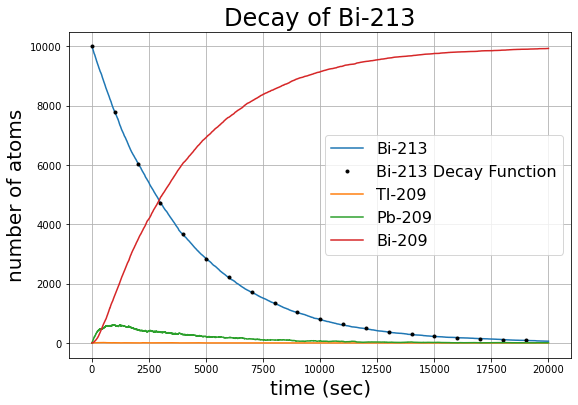

9934.0


In [82]:
plot.figure(figsize=(9,6))
plt.title('Decay of Bi-213',fontsize=24)
plt.plot(t,bi_213,label='Bi-213')
plt.plot(t[::1000],10000*2**(-t[::1000]/bi_213_half),'k.', label='Bi-213 Decay Function')
plt.plot(t,tl_209,label='Tl-209')
plt.plot(t,pb_209,label='Pb-209')
plt.plot(t,bi_209,label='Bi-209')
plot.xlabel("time (sec)",fontsize=20)
plot.ylabel("number of atoms",fontsize=20)
plot.grid()
plot.legend(fontsize=16)
plot.show()
plot.close()

#print(tl_209[::100])       # representative array (100 pts) of Tl-209 always close to zero since quick decay and low supply
#print(bi_209[t_max-1])     # Amount of Bi-209 at end of time period

#### Excercise 3

Combine the ideas from Examples 3 and 4 f the lecture notebook and generate random lifetimes for 1,000 atoms of Tl-208 by creating 1,000 random numbers from the PDF
$$p(t)dt =  \mu e^{-\mu t}$$

Instead of a histogram of these 1,000 randomly generated numbers, simply sort the array of lifetimes from smallest to longest using `numpy.sort`. For the shortest lifetime, there are $N-1$ atoms with longer lifetimes; for the next shorest lifetime, there are $N-2$ atoms with longer lifetimes, etc.

If you plot an array of integers $N\rightarrow0$ versus the generated lifetimes, you should reproduce the results from Example 3.

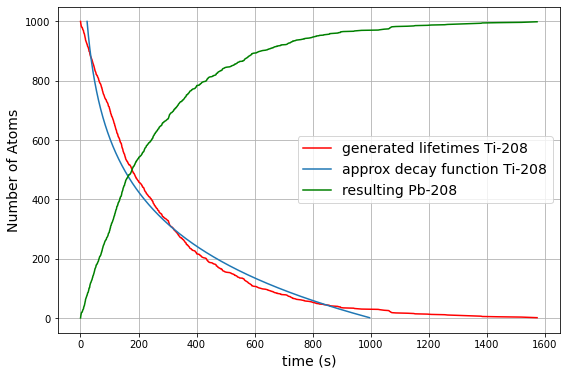

In [121]:
N = 1000
tau  = 3.053*60     # half-life (sec)
mu = np.log(2)/tau

data = np.empty(N,dtype=float)

for i in range(N):
    t = np.random.random()
    data[i] = (-1/mu)*np.log(1-t)
    #data[i] = mu*np.exp(-mu*t)
    
data = np.sort(data)
y = np.arange(N,0,-1)

plot.figure(figsize=(9,6))
plt.xlabel('time (s)',fontsize=14)
plt.ylabel('Number of Atoms',fontsize=14)
plt.plot(data,y,'r-',markersize=1,label='generated lifetimes Ti-208')
plt.plot(N*2**(-y/tau),y,label='approx decay function Ti-208')
plt.plot(data,N-y,'g-',markersize=1,label='resulting Pb-208')
plt.legend(fontsize=14)
plt.grid()
plt.show()
plt.close()

#### Excercise 6
Use the "shooting" method to estimate the area of a circle of radius 1.
<img width=200 src="circle.png"/>
A "hit" in the circle area is when randomly chosen point $(x,y)$
$$f(x,y)=\left\{\begin{array}{l}
&1&\textrm{ if }x^2+y^2\leq1\\
&0&\textrm{ otherwise}\end{array}\right.$$

Also calculate the error of the integral.

Extend your program to calculate the volume of a 10-dimensional hypershpere of radius 1 in each dimention.
A "hit" in the hypersphere is when randomly chosen point array $\{x_i\}$
$$f(\{x_i\})=\left\{\begin{array}{l}
&1&\textrm{ if }\sum x_i^2 \leq1\\
&0&\textrm{ otherwise}\end{array}\right.$$
The true volume of an <a href="https://en.wikipedia.org/wiki/Volume_of_an_n-ball">10-d sphere</a> is $$\pi^5/5!$$

In [387]:
N = 10**5
count = 0
area = 4

for i in range(N):
    x = 2*np.random.random()-1
    y = 2*np.random.random()-1
    if x**2 + y**2 <= 1 :
        count += 1
        
I = area*count/float(N)
sigma = np.sqrt((I*(area-I))/float(N))


print('calculated area: ' + str(I))
print('error: +/- ' + str(sigma))
print('true area: ' + str(np.pi))

calculated area: 3.14156
error: +/- 0.005193111558978875
true area: 3.141592653589793


In [388]:
N = 10**5
count = 0
area = 2**10

for i in range(N):
    squares = 0
    for j in range(10):
        xi = 2*np.random.random()-1
        squares = squares + xi**2
    if squares <= 1:
        count += 1

I = area*count/float(N)
sigma = np.sqrt((I*(area-I))/float(N))

print('calculated volume: ' + str(I))
print('error: +/- ' + str(sigma))
print('true volume: ' + str(np.pi**5/120))


calculated volume: 2.62144
error: +/- 0.16363015041019793
true volume: 2.550164039877345


#### Excercise 7
Verify the solution of the definite integral with Monte Carlo integration and importance sampling.
$$I = \int_0^1 \frac{x}{\sqrt{1-x^2}}dx=1$$

*Hint:* If we let 
$$w(x)=x,$$
then we have
$$\frac{f(x)}{w(x)}=\frac{1}{\sqrt{1-x^2}}$$
To generate values of $x$ according to the weighted function $w(x)$, we see that the PDF is
$$p(x)=\frac{x}{\int_0^1 x} dx = 2x$$
The RNG function is then
$$z=\int_0^x p(x')dx' = 2\int_0^x x dx = x^{2}$$
So we should generate random numbers by $x=\sqrt{z}$.
Then the integral is formed from the products of 
$$\left\langle \frac{f(x)}{w(x)}\right\rangle = \frac{1}{N}\sum_{i=1}^{N} \frac{1}{\sqrt{1-x^2}}$$
and 
$$\int_0^1 w(x)dx = \int_0^1 x dx = \frac{1}{2}$$

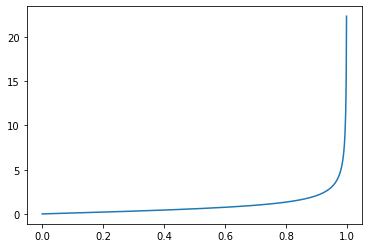

Monte Carlo approximation of integral is: 0.97086


In [411]:
def f(x):
    return x/np.sqrt(1-x*x)

x = np.linspace(0,1,1000,endpoint=False)

plt.plot(x,f(x))
plt.show()
plt.close()


# for monte carlo, consider the rectangle as 1x22. 
# Technically the function grows without bound as x -> 1 but f(0.999) approx = 22 

N = 10**5
area = 22
count = 0

for i in range(N):
    x = np.random.random()
    y = 22*np.random.random()
    if y <= f(x) :
        count += 1

I = area*count/float(N)

print('Monte Carlo approximation of integral is: ' + str(I))

In [412]:
sumf = 0
squaresumf = 0

for i in range(N):
    x = np.random.random()
    y = f(x)
    sumf = sumf + y
    squaresumf = squaresumf + y*y
    
avgf = sumf/float(N)
I = (1-0)*avgf
varf = squaresumf/N-avgf*avgf
stdevf = np.sqrt(varf)/np.sqrt(float(N))
print("Using the mean value method, the integral is : {0:5.4f} +/- {1:5.4f}".format(I,stdevf))

Using the mean value method, the integral is : 1.0060 +/- 0.0072


In [418]:
sumfw = 0
squaresumfw = 0

for i in range(N):
    x = np.random.random()**(1/2)
    y = f(x)/x
    sumfw = sumfw + y
    squaresumfw = squaresumfw + y*y

avgfw = sumfw/float(N)
I = 0.5*avgfw
varfw = squaresumfw/float(N)-avgfw*avgfw
stdevfw = 0.5*np.sqrt(varfw)/np.sqrt(float(N))

print("Using importance sampling the integral is : {0:6.5f} +/- {1:6.5f}".format(I,stdevfw))

Using importance sampling the integral is : 0.99403 +/- 0.00407
